# Networkx: a first introduction

NetworkX is a python-based package for complex networks computing. It contains a wide set of algorithms for generating, analysing, and drawing graphs.  
Information can be found on Git following the official page of the package:

https://networkx.github.io/documentation/stable/index.html

## Main features
- Data structures for representing many types of networks, or graphs
- Nodes can be any (hashable) Python object, edges can contain arbitrary data
- Flexibility ideal for representing networks found in many different fields
- Easy to install on multiple platforms
- Online up-to-date documentation

## When should I USE NetworkX?
- Unlike many other tools, it is designed to handle data on a scale relevant to modern problems.
- Most of the core algorithms rely on extremely fast legacy code
- Highly flexible graph implementations (a graph/node can be anything!)
- Extensive set of native readable and writable formats
- Takes advantage of Python’s ability to pull data from the Internet or databases

##  When should I AVOID NetworkX?
- Large-scale problems that require faster approaches (i.e. massive networks with 100M/1B edges)
- Better use of memory/threads than Python (large objects, parallel computation)


## Installation  
with pip you can install and upgrade, just type on the shell  
`pip install networkx`  
or, for upgrading  
`pip install --upgrade networkx`  
First of all import all the packages needed:

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

By definition, a Graph $G$ is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc).  
In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph,
a customized node object, etc. (Note: Python’s *None* object should not be used as a node as it determines whether
optional function arguments have been assigned in many functions.)  
**Note** Lists are not allowed, as they are not hashable in python.

In [53]:
G=nx.Graph()

## Adding Nodes  
Nodes can be addedd manually or read from a list:

In [54]:
G.add_node(1)
G.add_nodes_from([2,3])

Graphs can be easily visualised by typing

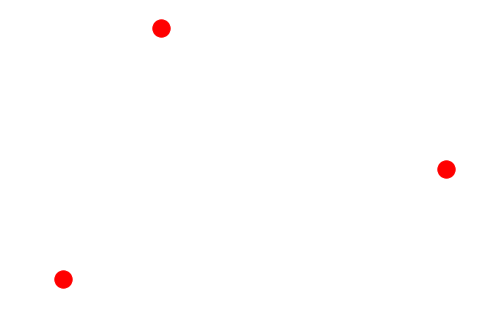

In [55]:
nx.draw(G)

Another option is to add a *nbunch* of nodes. An *nbunch* is any iterable container of nodes that is not itself a node in the graph. (e.g. a list, set, graph, file, etc..). Even another graph works.

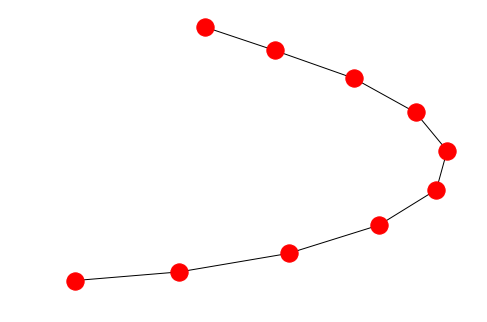

In [56]:
#First I create a path graph
H=nx.path_graph(10)
nx.draw(H)

In [57]:
#then I include it in the graph
G.add_nodes_from(H)

In [58]:
len(nx.nodes(G))

10

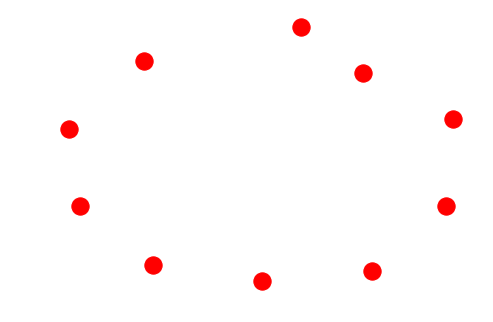

In [59]:
nx.draw(G)

#The edges!!!!

The graph $G$ now contains $H$ nodes. 

In [60]:
G.add_node(H)

Now $G$ contains $H$ as a _node_. This flexibility is very effective as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in $G$ and have a separate dictionary keyed by identifier to the node information if you prefer. 

*(Note: You should not change the node object if the hash depends on its contents.)*

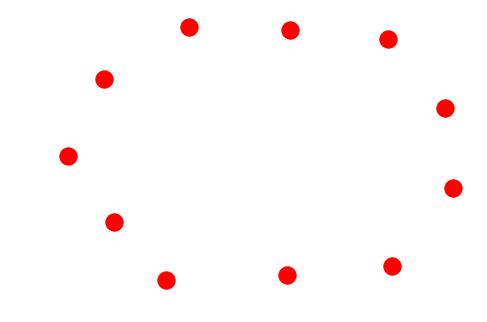

In [61]:
nx.draw(G)

#The edges!!!!

In [62]:
len(nx.nodes(G))

11

## Adding Edges

As for nodes, edges can be added one by one or imported form a file, another graph etc.

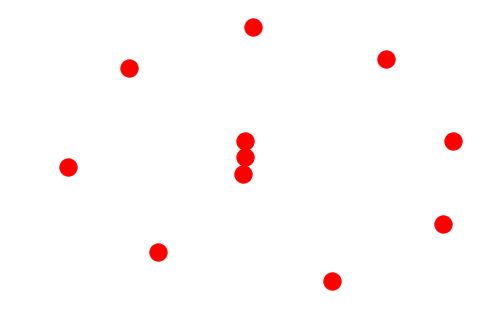

In [65]:
#G can also be grown by adding one edge at a time,
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e) # unpack edge tuple*
nx.draw(G)

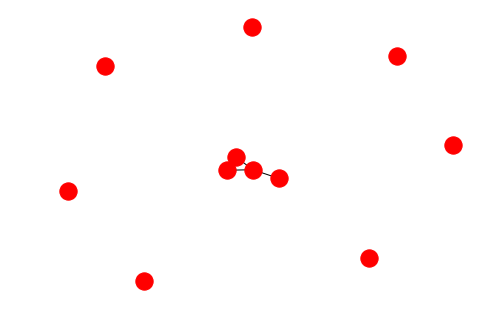

In [68]:
#by adding a list of edges,
G.add_edges_from([(1,4),(1,3)])
nx.draw(G)

As for nodes we can add any *ebunch* of edges. An *ebunch* is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g. 

    (2,3,{‘weight’:3.1415}). 

Edge attributes are discussed further below

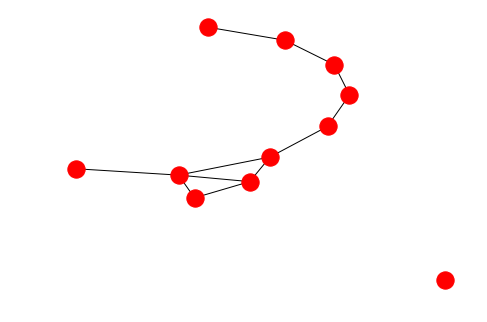

In [69]:
G.add_edges_from(H.edges())
nx.draw(G)

## Removing edges or nodes

Graphs can be demolished in a similar way by using: 

    Graph.remove_node()
    Graph.remove_nodes_from()
    Graph.remove_edge()
    Graph.remove_edges_from()

By example:

In [70]:
#We can remove some spefic set of nodes
G.remove_nodes_from(H)

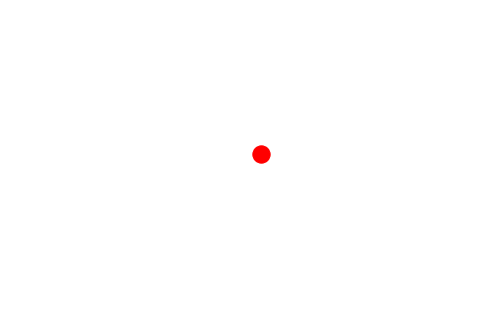

In [72]:
nx.draw(G)

In [73]:
#or we can wipe out everything
G.clear() # this removes everything!

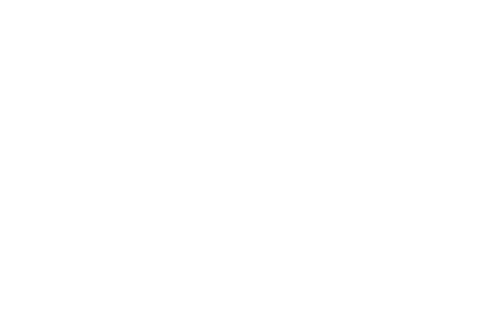

In [74]:
nx.draw(G)

There are no problems when adding existing nodes or edges. For example, after removing all nodes and edges, NetworkX does not complain :)

In [75]:
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam") # adds node "spam". Yes, a node can be a string too...
G.add_nodes_from("spam") # adds 4 nodes: ’s’, ’p’, ’a’, ’m’, when the "s" really marks the difference :)

Nodes and edges are not specified as NetworkX objects. All meaningful items can be used as nodes and edges. 

Common choices are numbers or strings, but a node can be any hashable object(except None), and an edge can be associated with any object X using: 

    G.add_edge(n1,n2,object=X) 

As an example, n1 and n2 could be names in the internet movie database, and x could refer to an XML record of characters played together with the intractions with other actors.

You can also use 

    convert_node_labels_to_integers() 

and obtain a more traditional graph with integer labels.

## Inspecting the graph

In [76]:
NoN=G.number_of_nodes()
NoE=G.number_of_edges()

#We can examine them with
NoN, NoE,G.nodes()

(8, 2, NodeView(('a', 1, 2, 3, 'spam', 'm', 'p', 's')))

In [77]:
G.edges()

EdgeView([(1, 2), (1, 3)])

In [86]:
neigh=G.neighbors(1)
neigh

<dictionary-keyiterator at 0x123ad8d60>

A odd way of presenting the result...

In [87]:
list(neigh)

[2, 3]

Removing nodes or edges has similar syntax to adding

In [88]:
G.remove_nodes_from("spam")
G.nodes()

NodeView((1, 2, 3, 'spam'))

In [89]:
#otherwise you can remove a single specific edge:
G.remove_edge(1,3)
G.edges()

EdgeView([(1, 2)])

## Accessing edges

Fast direct access to the graph data structure is possible using subscript notation

In [90]:
G[1]

AtlasView({2: {}})

In [91]:
G[1][2]

{}

You can safely set the attributes of an edge using subscript notation if the edge already exists

In [92]:
G.add_edge(1,3)
G[1][3]['color']='blue'

Fast examination of all edges is achieved using *adjacency iterators*. Note that for undirected graphs this actually looks at each edge twice!

In [ ]:
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])

In [97]:
list(FG.adjacency())

[(1, {2: {'weight': 0.125}, 3: {'weight': 0.75}}),
 (2, {1: {'weight': 0.125}, 4: {'weight': 1.2}}),
 (3, {1: {'weight': 0.75}, 4: {'weight': 0.375}}),
 (4, {2: {'weight': 1.2}, 3: {'weight': 0.375}})]

Each element is a tuple whose first element is the node and the second is a dictionary (of a dictionary) of its connections.

In [100]:
for n,nbrs in FG.adjacency():
    # n and nbrs are respectively the node and the dictionary of dictionaries
    for nbr,eattr in nbrs.items():
        # nbrs is a the 'parent' dictionary
        # eattr is again a dictionary
        data=eattr['weight']
        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


## Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or
edges.  
Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be
hashable).   
By default these are empty, but attributes can be added or changed using add_edge, add_node or direct
manipulation of the attribute dictionaries named for a graph $G$:
    
    G.graph
    G.node
    G.edge

In [101]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Attributes can be modified later, as for dictionaries:

In [102]:
G.graph['day']='Monday'
G.graph


{'day': 'Monday'}

node attributes work the same way. Add node attributes work the same way:  

    add_edge()
    add_edges_from()

subscript notation, or 

    G.edge

In [103]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])
G[1][2]['weight'] = 4.7
G[1][2]['weight'] = 4

Note: The special attribute *weight* should be numeric and holds values used by algorithms requiring weighted edges

## Directed graphs

The *DiGraph* class provides additional methods specific to directed edges, e.g. 

    DiGraph.out_edges()
    DiGraph.in_degree() 
    DiGraph.predecessors() 
    DiGraph.successors() 

etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() and degree() are equivalent to successors() and the sum of in_degree() and out_degree() respectively even though that may feel inconsistent at times.

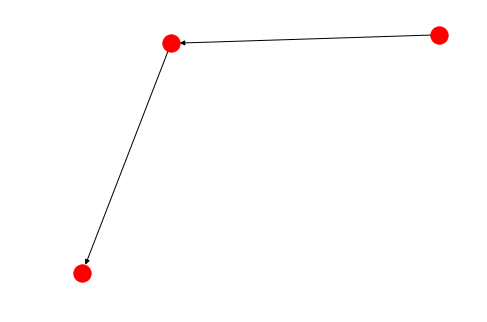

In [104]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
nx.draw(DG)

In [105]:
DG.out_degree(1,weight='weight'), DG.degree(1,weight='weight')

(0.5, 1.25)

In [107]:
list(DG.successors(1))

[2]

In [106]:
list(DG.neighbors(1))

[2]

## Graph generators and graph operations

**subgraph(G, nbunch)** - induce subgraph of $G$ on nodes in nbunch  
**union(G1,G2)** - graph union  
**disjoint_union(G1,G2)** - graph union assuming all nodes are different  
**cartesian_product(G1,G2)** - return Cartesian product graph  
**compose(G1,G2)** - combine graphs identifying nodes common to both  
**complement(G)** - graph complement  
**create_empty_copy(G)** - return an empty copy of the same graph class    
**convert_to_undirected(G)** - return an undirected representation of $G$  
**convert_to_directed(G)** - return a directed representation of $G$  

There are also calls to generate the most common graphs, by example:

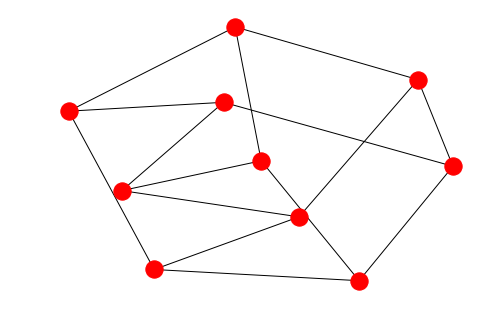

In [108]:
#small graphs
petersen=nx.petersen_graph()
tutte=nx.tutte_graph()
maze=nx.sedgewick_maze_graph()
tet=nx.tetrahedral_graph()

nx.draw(petersen)

Using a (constructive) generator for a classic graph

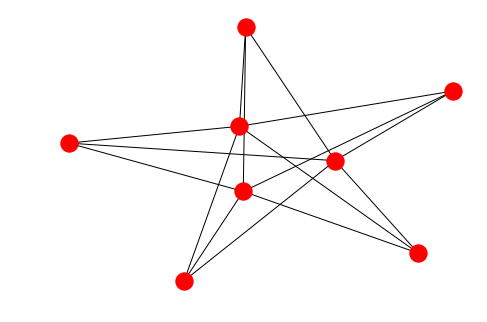

In [109]:
K_5=nx.complete_graph(5)
K_3_5=nx.complete_bipartite_graph(3,5)
barbell=nx.barbell_graph(10,10)
lollipop=nx.lollipop_graph(10,20)
nx.draw(K_3_5)

Using a stochastic graph generator, e.g.

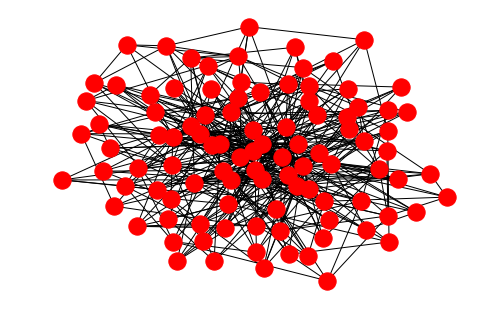

In [110]:
er=nx.erdos_renyi_graph(100,0.15)
ws=nx.watts_strogatz_graph(30,3,0.1)
ba=nx.barabasi_albert_graph(100,5)
red=nx.random_lobster(100,0.9,0.9)
nx.draw(ba)